# Flood Prediction - Exploratory Data Analysis
## Playground Series S4E5

This notebook explores the flood prediction dataset to understand:
- Data structure and quality
- Feature distributions
- Correlations and relationships
- Target variable characteristics

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

%matplotlib inline

## 1. Load Data

In [2]:
# Load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Train shape: (1117957, 22)
Test shape: (745305, 21)
Sample submission shape: (745305, 2)


## 2. Basic Data Inspection

In [3]:
# Display first few rows
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [4]:
# Data types and info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
# Statistical summary
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## 3. Missing Values Analysis

In [6]:
# Check for missing values
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

print("Missing values in train:")
print(missing_train[missing_train > 0])
print("\nMissing values in test:")
print(missing_test[missing_test > 0])

Missing values in train:
Series([], dtype: int64)

Missing values in test:
Series([], dtype: int64)


## 4. Target Variable Analysis

FloodProbability Statistics:
count    1.117957e+06
mean     5.044803e-01
std      5.102610e-02
min      2.850000e-01
25%      4.700000e-01
50%      5.050000e-01
75%      5.400000e-01
max      7.250000e-01
Name: FloodProbability, dtype: float64


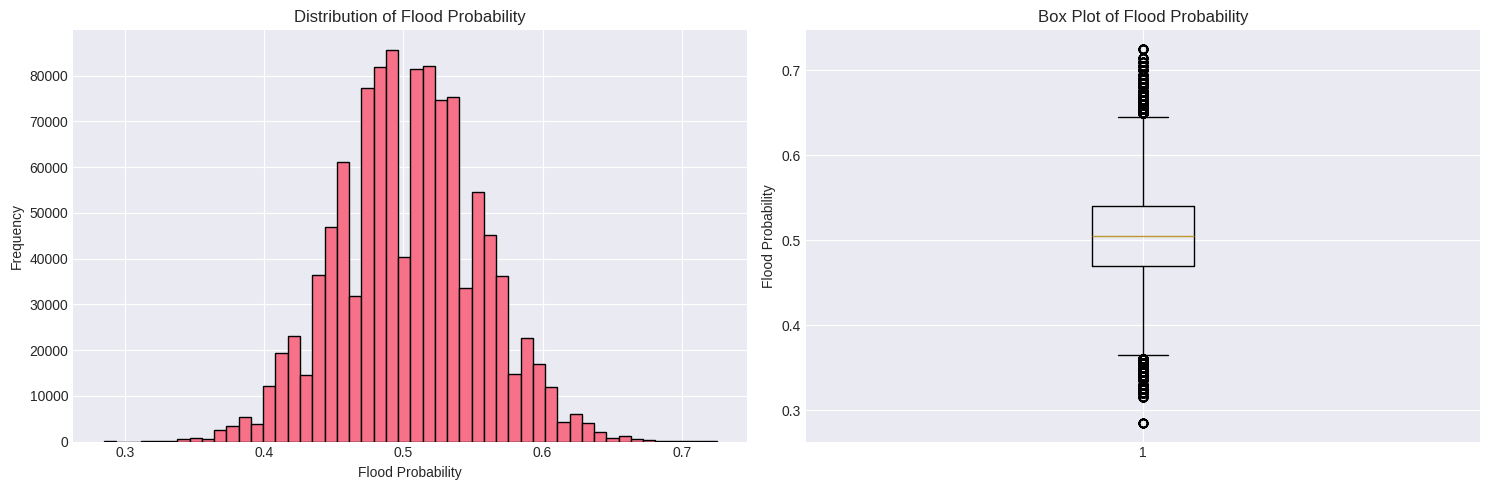

In [7]:
# Target variable statistics
print("FloodProbability Statistics:")
print(train['FloodProbability'].describe())

# Distribution plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train['FloodProbability'], bins=50, edgecolor='black')
axes[0].set_xlabel('Flood Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Flood Probability')

# Box plot
axes[1].boxplot(train['FloodProbability'])
axes[1].set_ylabel('Flood Probability')
axes[1].set_title('Box Plot of Flood Probability')

plt.tight_layout()
plt.show()

## 5. Feature Distributions

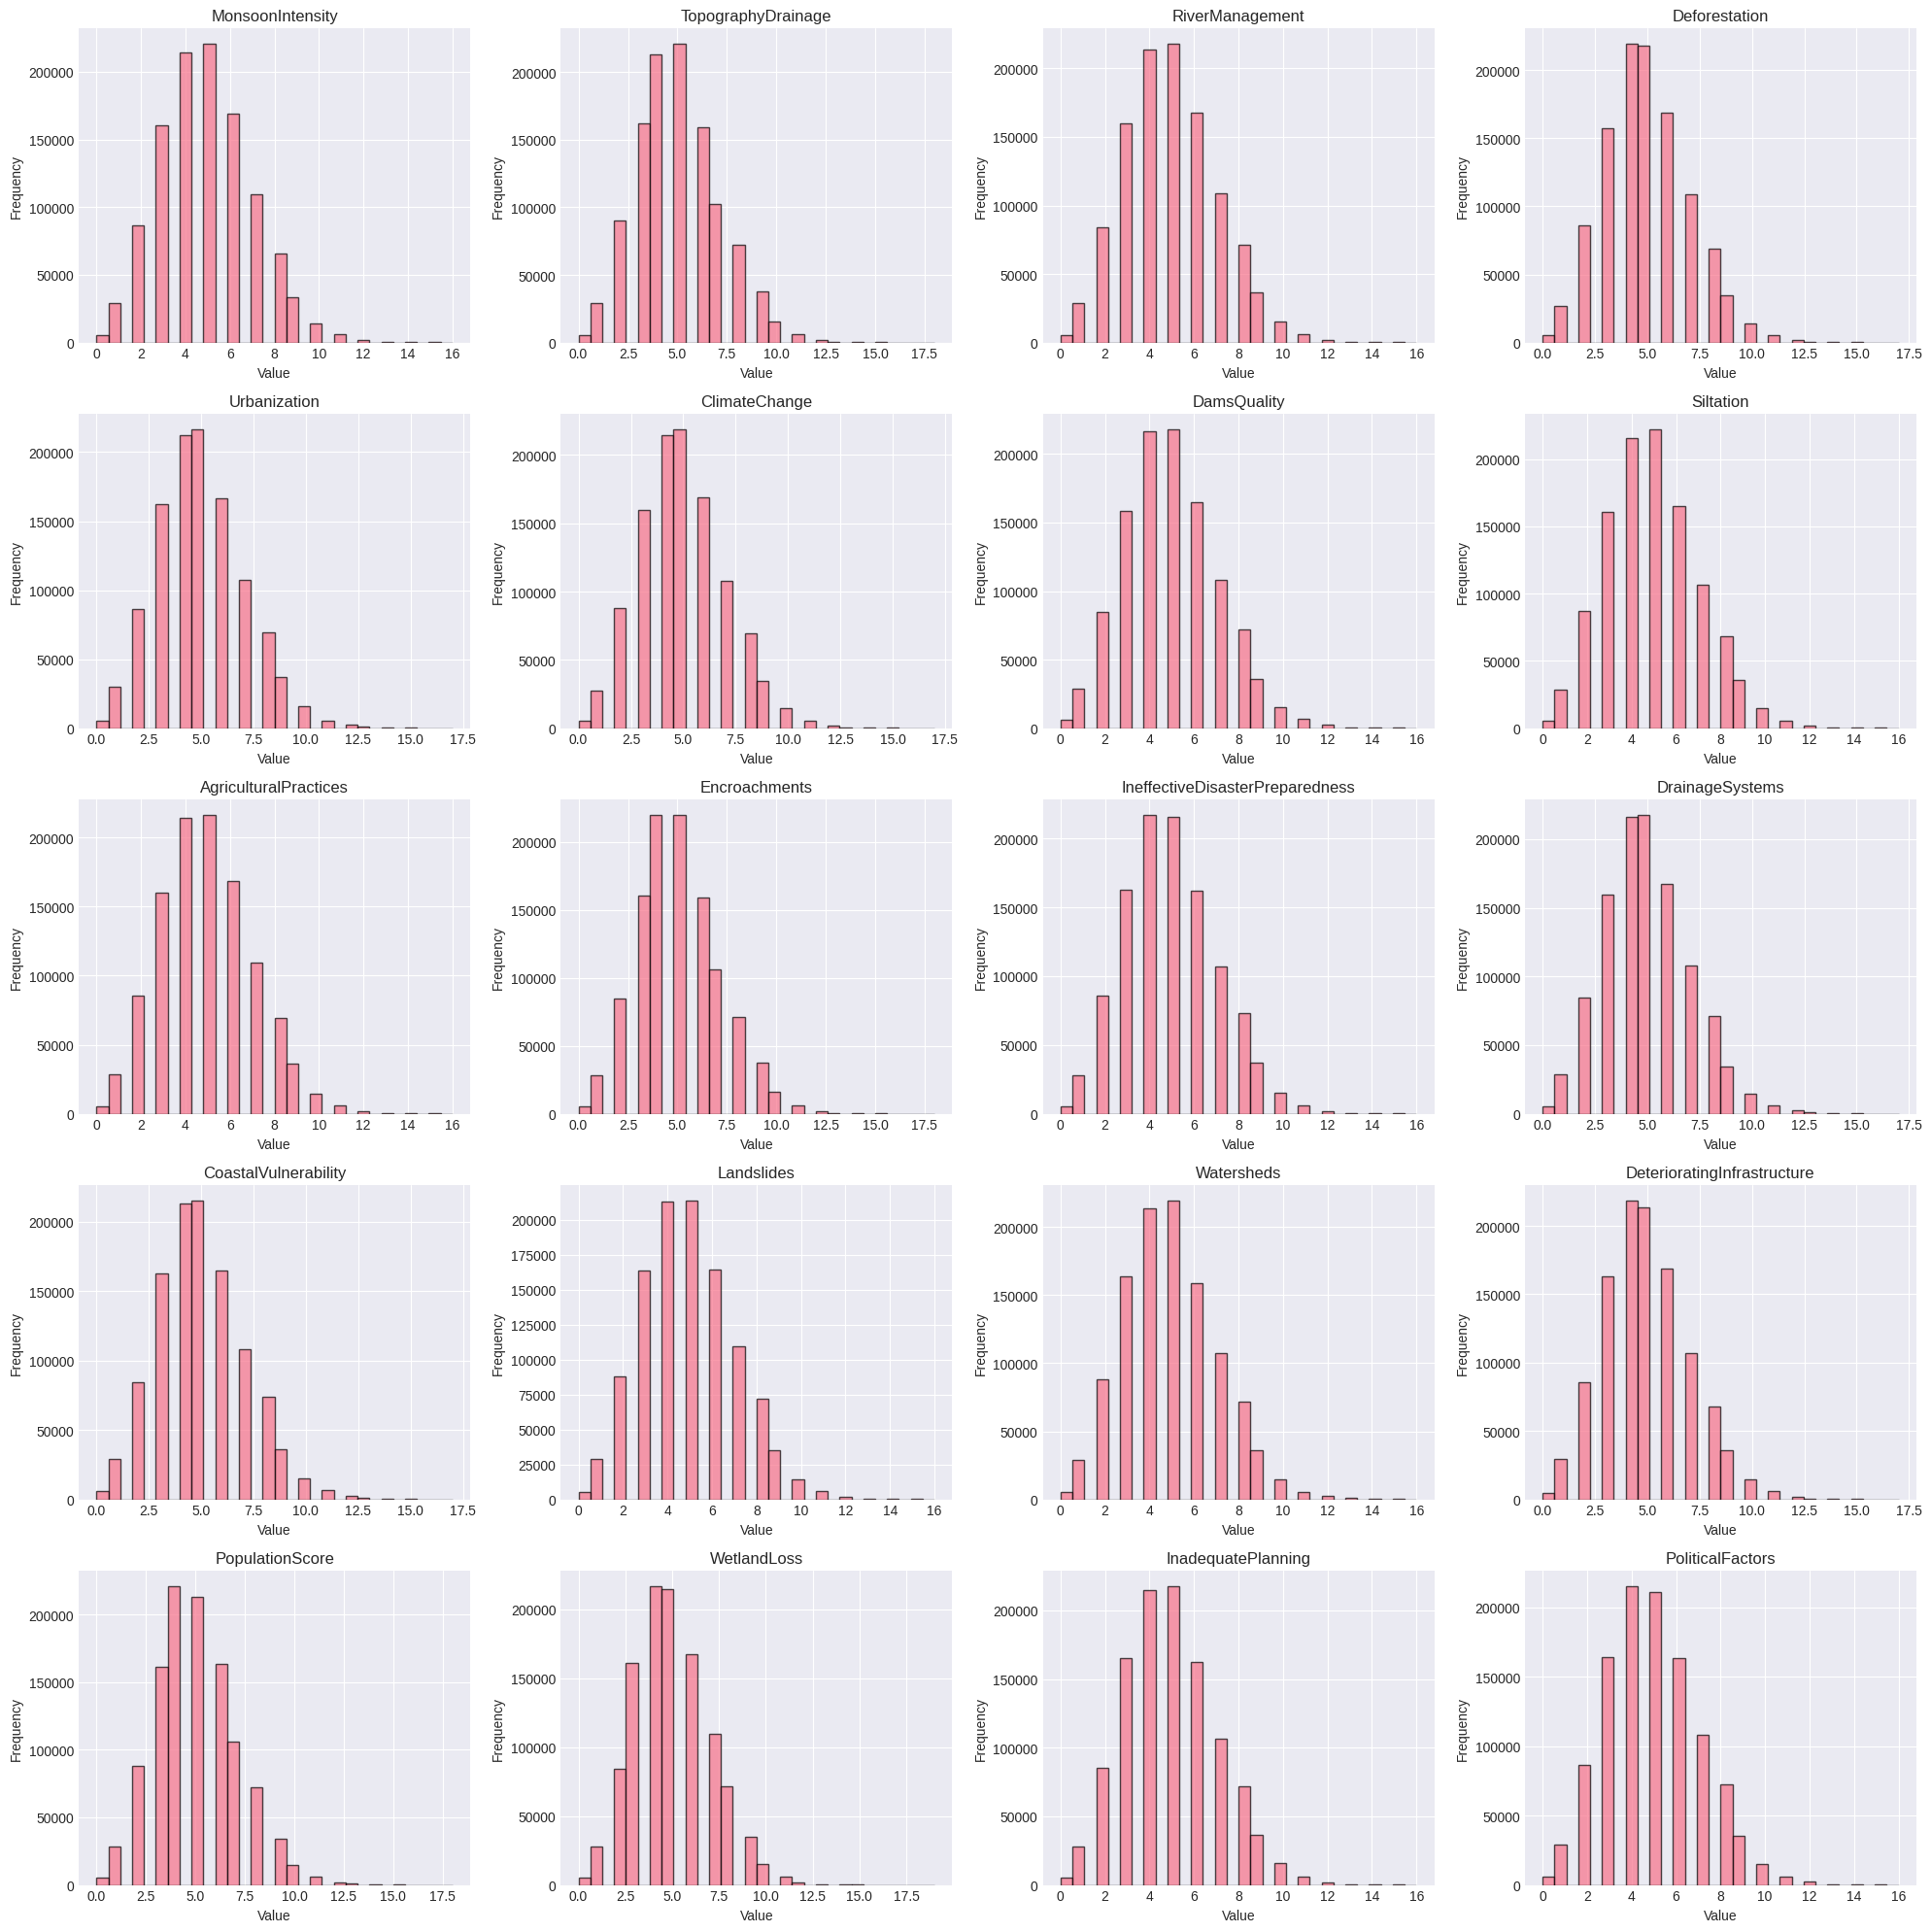

In [8]:
# Get all feature columns (excluding id and target)
feature_cols = [col for col in train.columns if col not in ['id', 'FloodProbability']]

# Plot distributions
n_cols = 4
n_rows = (len(feature_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(train[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide unused subplots
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

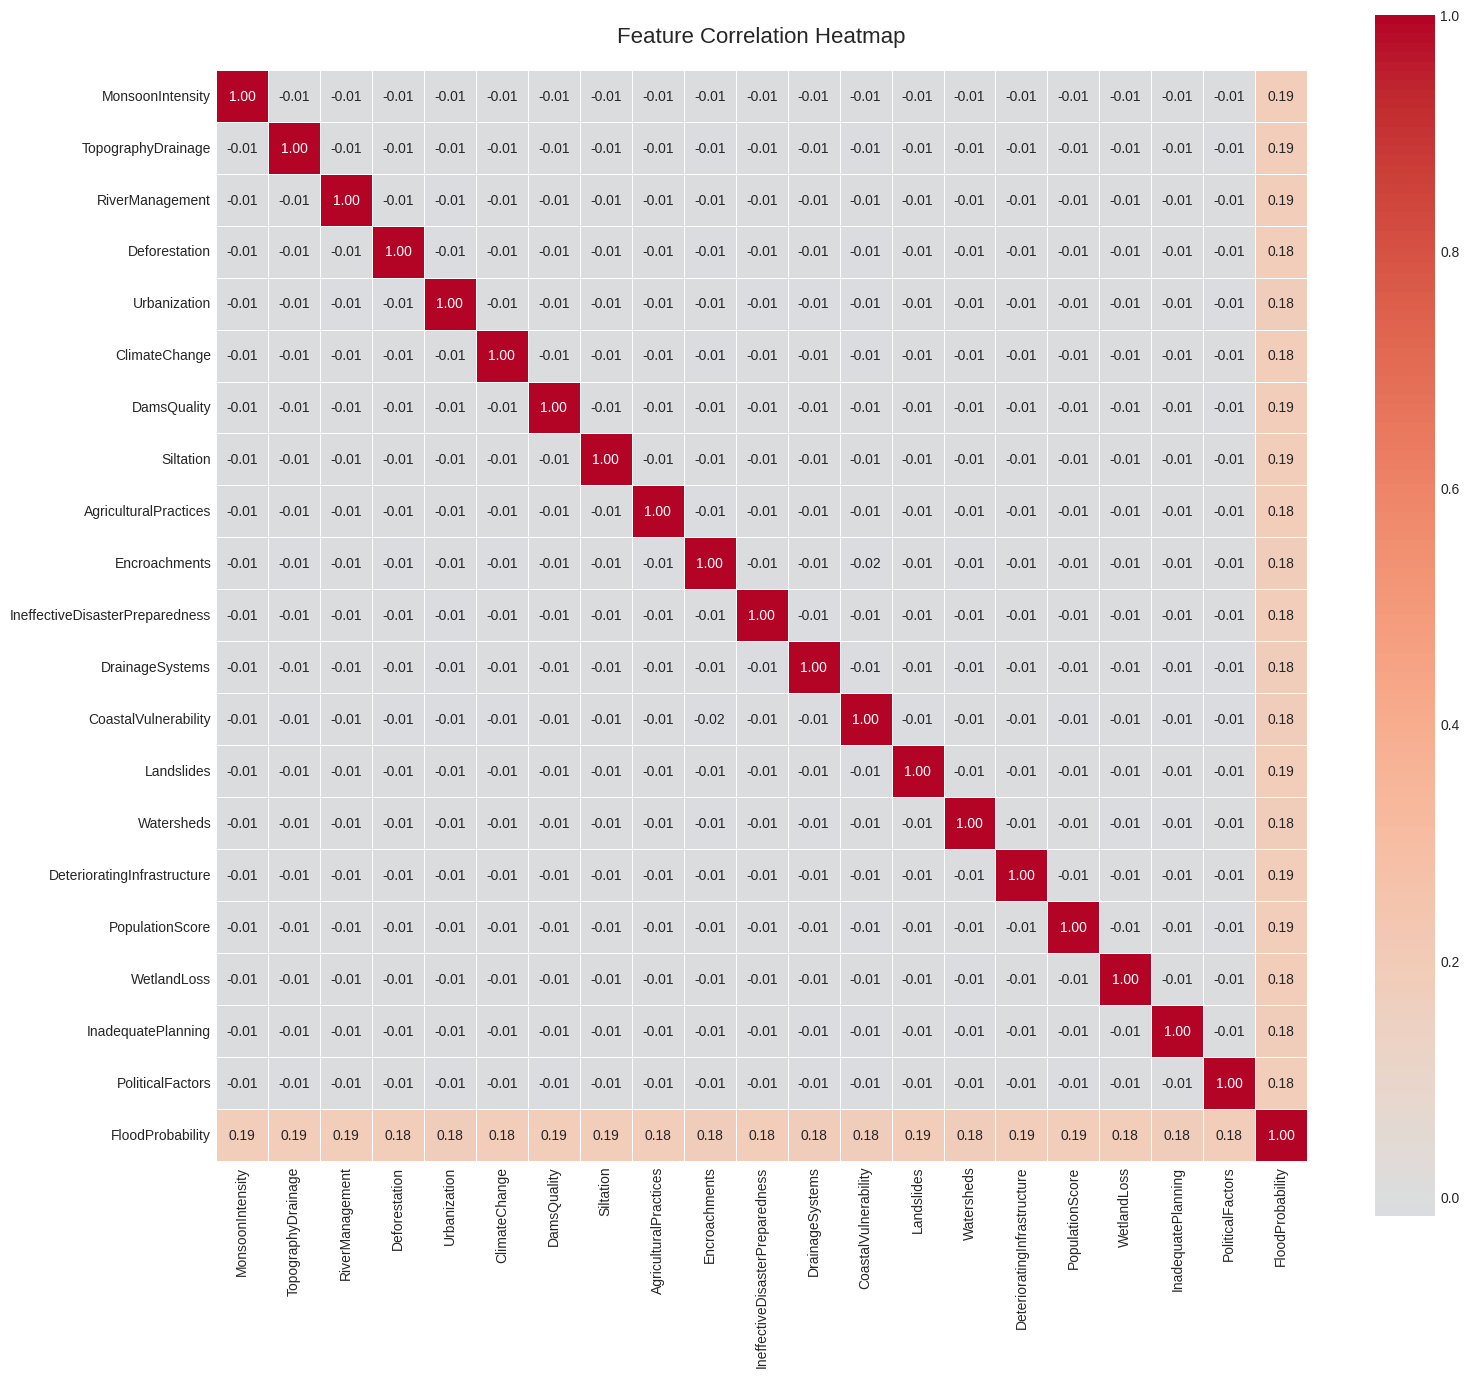

In [9]:
# Correlation matrix
correlation_matrix = train[feature_cols + ['FloodProbability']].corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Top 10 features correlated with FloodProbability:
FloodProbability               1.000000
DeterioratingInfrastructure    0.190007
MonsoonIntensity               0.189098
DamsQuality                    0.187996
TopographyDrainage             0.187635
RiverManagement                0.187131
Siltation                      0.186789
PopulationScore                0.185890
Landslides                     0.185346
ClimateChange                  0.184761
Deforestation                  0.184001
Name: FloodProbability, dtype: float64


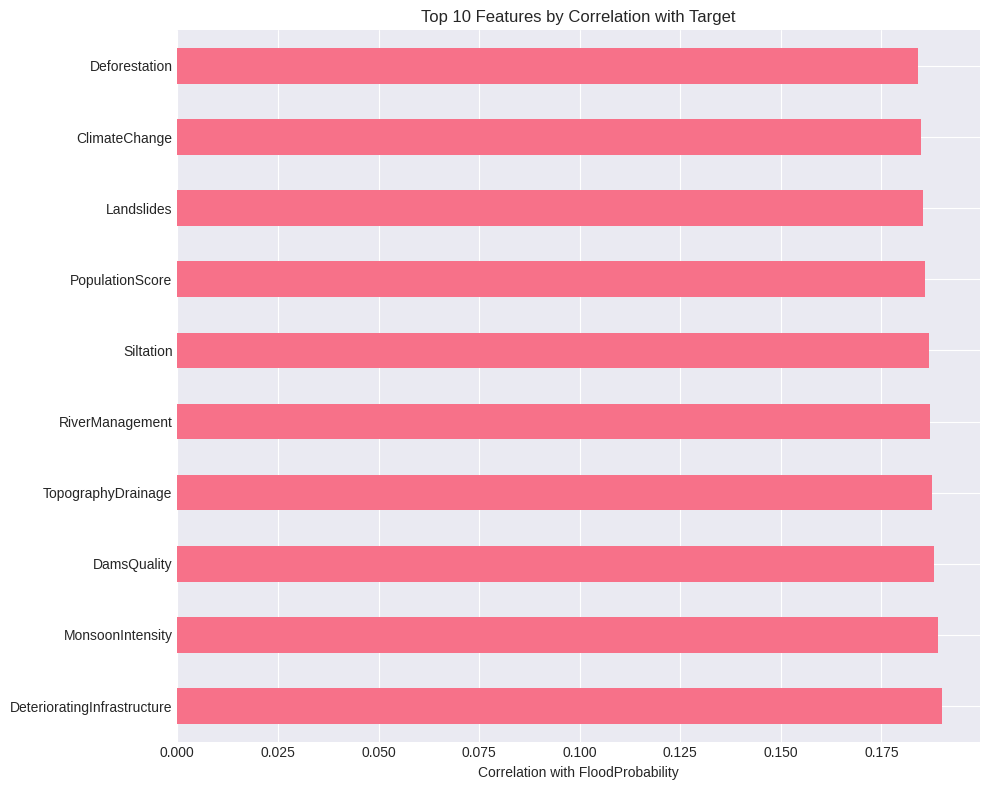

In [10]:
# Top correlations with target
target_corr = correlation_matrix['FloodProbability'].sort_values(ascending=False)
print("Top 10 features correlated with FloodProbability:")
print(target_corr.head(11))  # 11 to exclude FloodProbability itself

# Visualize
plt.figure(figsize=(10, 8))
target_corr[1:11].plot(kind='barh')
plt.xlabel('Correlation with FloodProbability')
plt.title('Top 10 Features by Correlation with Target')
plt.tight_layout()
plt.show()

## 7. Feature Relationships with Target

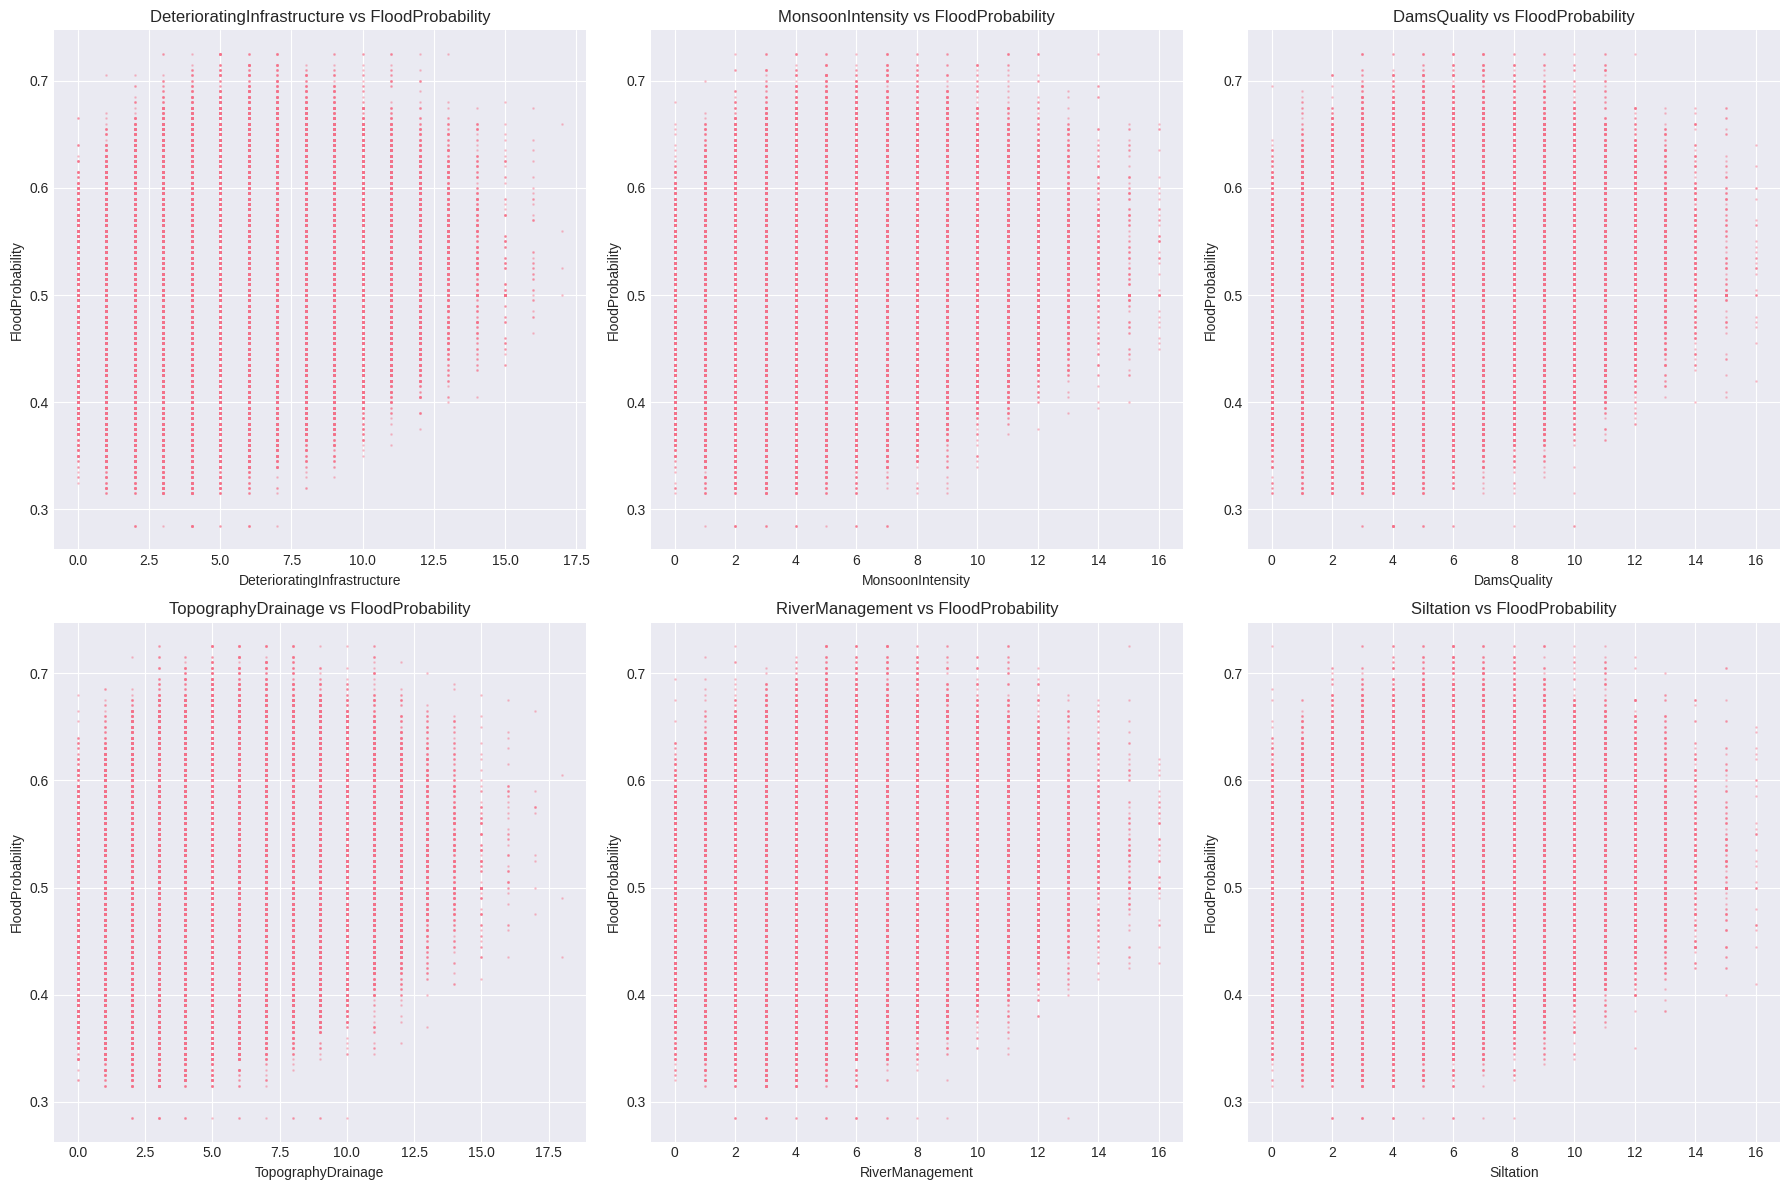

In [11]:
# Scatter plots for top correlated features
top_features = target_corr[1:7].index.tolist()  # Top 6 features

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(train[feature], train['FloodProbability'], alpha=0.3, s=1)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('FloodProbability')
    axes[idx].set_title(f'{feature} vs FloodProbability')

plt.tight_layout()
plt.show()

## 8. Data Quality Checks

In [12]:
# Check for duplicates
print(f"Duplicate rows in train: {train.duplicated().sum()}")
print(f"Duplicate rows in test: {test.duplicated().sum()}")

# Check value ranges
print("\nValue ranges for each feature:")
for col in feature_cols:
    print(f"{col}: [{train[col].min()}, {train[col].max()}]")

Duplicate rows in train: 0
Duplicate rows in test: 0

Value ranges for each feature:
MonsoonIntensity: [0, 16]
TopographyDrainage: [0, 18]
RiverManagement: [0, 16]
Deforestation: [0, 17]
Urbanization: [0, 17]
ClimateChange: [0, 17]
DamsQuality: [0, 16]
Siltation: [0, 16]
AgriculturalPractices: [0, 16]
Encroachments: [0, 18]
IneffectiveDisasterPreparedness: [0, 16]
DrainageSystems: [0, 17]
CoastalVulnerability: [0, 17]
Landslides: [0, 16]
Watersheds: [0, 16]
DeterioratingInfrastructure: [0, 17]
PopulationScore: [0, 18]
WetlandLoss: [0, 19]
InadequatePlanning: [0, 16]
PoliticalFactors: [0, 16]


## 9. Data Leakage Checks

Checking for potential data leakage issues that could inflate model performance:
- Suspiciously high correlations with target
- Perfect predictors
- Train/test distribution differences
- Constant or near-constant features
- Features containing future information

In [13]:
# 1. Check for suspiciously high correlations with target
print("="*80)
print("1. CORRELATION ANALYSIS - Checking for suspiciously high correlations")
print("="*80)

from scipy.stats import pearsonr

correlations = {}
for col in feature_cols:
    corr, p_value = pearsonr(train[col], train['FloodProbability'])
    correlations[col] = {'correlation': corr, 'p_value': p_value}

# Sort by absolute correlation
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)

print(f"\n{'Feature':<40} {'Correlation':>12} {'P-value':>12} {'Status':>15}")
print("-" * 80)

for feature, stats in sorted_corr:
    corr = stats['correlation']
    p_val = stats['p_value']
    
    if abs(corr) > 0.95:
        status = "⚠️ SUSPICIOUS"
    elif abs(corr) > 0.8:
        status = "⚡ Very High"
    elif abs(corr) > 0.5:
        status = "✓ High"
    elif abs(corr) > 0.3:
        status = "✓ Moderate"
    else:
        status = "✓ Low"
    
    print(f"{feature:<40} {corr:>12.4f} {p_val:>12.2e} {status:>15}")

1. CORRELATION ANALYSIS - Checking for suspiciously high correlations

Feature                                   Correlation      P-value          Status
--------------------------------------------------------------------------------
DeterioratingInfrastructure                    0.1900     0.00e+00           ✓ Low
MonsoonIntensity                               0.1891     0.00e+00           ✓ Low
DamsQuality                                    0.1880     0.00e+00           ✓ Low
TopographyDrainage                             0.1876     0.00e+00           ✓ Low
RiverManagement                                0.1871     0.00e+00           ✓ Low
Siltation                                      0.1868     0.00e+00           ✓ Low
PopulationScore                                0.1859     0.00e+00           ✓ Low
Landslides                                     0.1853     0.00e+00           ✓ Low
ClimateChange                                  0.1848     0.00e+00           ✓ Low
Deforestation     

In [14]:
# 2. Check for perfect predictors (potential leakage)
print("\n" + "="*80)
print("2. PERFECT PREDICTOR CHECK")
print("="*80)

perfect_predictors = []
for col in feature_cols:
    grouped = train.groupby(col)['FloodProbability'].agg(['mean', 'std', 'count'])
    
    if (grouped['std'].fillna(0) == 0).all():
        perfect_predictors.append(col)
        print(f"\n⚠️ {col}: Perfect predictor detected!")
        print(f"   Each unique value maps to exactly one target value")

if not perfect_predictors:
    print("\n✓ No perfect predictors found")


2. PERFECT PREDICTOR CHECK

✓ No perfect predictors found


In [15]:
# 3. Check train/test distribution similarity
print("\n" + "="*80)
print("3. TRAIN/TEST DISTRIBUTION COMPARISON")
print("="*80)

from scipy.stats import ks_2samp

print(f"\n{'Feature':<40} {'KS Statistic':>15} {'P-value':>12} {'Status':>15}")
print("-" * 80)

distribution_issues = []
for col in feature_cols:
    ks_stat, p_value = ks_2samp(train[col], test[col])
    
    if p_value < 0.01:
        status = "⚠️ Different"
        distribution_issues.append(col)
    elif p_value < 0.05:
        status = "⚡ Slightly Diff"
    else:
        status = "✓ Similar"
    
    print(f"{col:<40} {ks_stat:>15.4f} {p_value:>12.4f} {status:>15}")

if distribution_issues:
    print(f"\n⚠️ {len(distribution_issues)} feature(s) with significantly different distributions")


3. TRAIN/TEST DISTRIBUTION COMPARISON

Feature                                     KS Statistic      P-value          Status
--------------------------------------------------------------------------------
MonsoonIntensity                                  0.0018       0.0940       ✓ Similar
TopographyDrainage                                0.0009       0.8952       ✓ Similar
RiverManagement                                   0.0013       0.4201       ✓ Similar
Deforestation                                     0.0009       0.8950       ✓ Similar
Urbanization                                      0.0015       0.2502       ✓ Similar
ClimateChange                                     0.0005       1.0000       ✓ Similar
DamsQuality                                       0.0012       0.5206       ✓ Similar
Siltation                                         0.0007       0.9736       ✓ Similar
AgriculturalPractices                             0.0012       0.5026       ✓ Similar
Encroachments      

In [16]:
# 4. Check for constant or near-constant features
print("\n" + "="*80)
print("4. CONSTANT/NEAR-CONSTANT FEATURE CHECK")
print("="*80)

low_variance_features = []
for col in feature_cols:
    unique_ratio = train[col].nunique() / len(train)
    
    if unique_ratio < 0.01:
        low_variance_features.append(col)
        print(f"\n⚠️ {col}: Only {train[col].nunique()} unique values ({unique_ratio:.2%} of data)")
        print(f"   Top values: {train[col].value_counts().head(3).to_dict()}")

if not low_variance_features:
    print("\n✓ No low-variance features detected")


4. CONSTANT/NEAR-CONSTANT FEATURE CHECK

⚠️ MonsoonIntensity: Only 17 unique values (0.00% of data)
   Top values: {5: 220936, 4: 214344, 6: 169080}

⚠️ TopographyDrainage: Only 19 unique values (0.00% of data)
   Top values: {5: 221252, 4: 213368, 3: 161989}

⚠️ RiverManagement: Only 17 unique values (0.00% of data)
   Top values: {5: 218216, 4: 214079, 6: 167368}

⚠️ Deforestation: Only 18 unique values (0.00% of data)
   Top values: {4: 219733, 5: 217793, 6: 169175}

⚠️ Urbanization: Only 18 unique values (0.00% of data)
   Top values: {5: 216722, 4: 212438, 6: 166703}

⚠️ ClimateChange: Only 18 unique values (0.00% of data)
   Top values: {5: 218995, 4: 214268, 6: 169316}

⚠️ DamsQuality: Only 17 unique values (0.00% of data)
   Top values: {5: 218237, 4: 216308, 6: 164786}

⚠️ Siltation: Only 17 unique values (0.00% of data)
   Top values: {5: 222270, 4: 215232, 6: 164780}

⚠️ AgriculturalPractices: Only 17 unique values (0.00% of data)
   Top values: {5: 216644, 4: 214366, 6: 16

In [17]:
# 5. Check for features that might contain future information
print("\n" + "="*80)
print("5. FUTURE INFORMATION LEAKAGE CHECK")
print("="*80)

consequence_keywords = ['score', 'probability', 'risk', 'impact', 'damage', 'loss', 'severity']
potential_leakage = []

for col in feature_cols:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in consequence_keywords):
        potential_leakage.append(col)

if potential_leakage:
    print("\n⚠️ Features that might contain consequence information:")
    for col in potential_leakage:
        corr = correlations[col]['correlation']
        print(f"   - {col} (correlation: {corr:.4f})")
    print("\n   ⚠️ Review these to ensure they don't contain post-flood information")
else:
    print("\n✓ No obvious consequence-based features detected")


5. FUTURE INFORMATION LEAKAGE CHECK

⚠️ Features that might contain consequence information:
   - PopulationScore (correlation: 0.1859)
   - WetlandLoss (correlation: 0.1834)

   ⚠️ Review these to ensure they don't contain post-flood information


In [18]:
# 6. Summary and Recommendations
print("\n" + "="*80)
print("LEAKAGE CHECK SUMMARY")
print("="*80)

issues_found = []

# Collect all issues
high_corr_features = [f for f, s in sorted_corr if abs(s['correlation']) > 0.95]
if high_corr_features:
    issues_found.append(f"⚠️ {len(high_corr_features)} feature(s) with correlation >0.95: {', '.join(high_corr_features)}")

if perfect_predictors:
    issues_found.append(f"⚠️ {len(perfect_predictors)} perfect predictor(s): {', '.join(perfect_predictors)}")

if distribution_issues:
    issues_found.append(f"⚠️ {len(distribution_issues)} feature(s) with different train/test distributions")

if low_variance_features:
    issues_found.append(f"⚠️ {len(low_variance_features)} low-variance feature(s)")

if potential_leakage:
    issues_found.append(f"⚠️ {len(potential_leakage)} feature(s) with potential consequence information")

if issues_found:
    print("\n⚠️ POTENTIAL ISSUES DETECTED:\n")
    for i, issue in enumerate(issues_found, 1):
        print(f"{i}. {issue}")
    
    print("\n📋 RECOMMENDATIONS:")
    print("   1. Investigate flagged features for data leakage")
    print("   2. Verify feature definitions with domain experts")
    print("   3. Consider removing or transforming suspicious features")
    print("   4. Document any features kept despite high correlations")
    print("   5. Monitor model performance on validation set vs test set")
else:
    print("\n✅ No major leakage issues detected!")
    print("   Dataset appears clean for modeling")

print("\n" + "="*80)


LEAKAGE CHECK SUMMARY

⚠️ POTENTIAL ISSUES DETECTED:

1. ⚠️ 20 low-variance feature(s)
2. ⚠️ 2 feature(s) with potential consequence information

📋 RECOMMENDATIONS:
   1. Investigate flagged features for data leakage
   2. Verify feature definitions with domain experts
   3. Consider removing or transforming suspicious features
   4. Document any features kept despite high correlations
   5. Monitor model performance on validation set vs test set



In [19]:
# 7. Drop leakage columns if any exist
print("\n" + "="*80)
print("7. DROPPING LEAKAGE COLUMNS")
print("="*80)

# Collect all columns to drop
columns_to_drop = []

# Add high correlation features (>0.95)
high_corr_features = [f for f, s in sorted_corr if abs(s['correlation']) > 0.95]
columns_to_drop.extend(high_corr_features)

# Add perfect predictors
columns_to_drop.extend(perfect_predictors)

# Remove duplicates
columns_to_drop = list(set(columns_to_drop))

if columns_to_drop:
    print(f"\n⚠️ Dropping {len(columns_to_drop)} leakage column(s):")
    for col in columns_to_drop:
        print(f"   - {col}")
    
    # Drop from train
    train_original_shape = train.shape
    train = train.drop(columns=columns_to_drop, errors='ignore')
    
    # Drop from test
    test_original_shape = test.shape
    test = test.drop(columns=columns_to_drop, errors='ignore')
    
    # Update feature_cols
    feature_cols = [col for col in feature_cols if col not in columns_to_drop]
    
    print(f"\n✅ Columns dropped successfully!")
    print(f"   Train shape: {train_original_shape} → {train.shape}")
    print(f"   Test shape: {test_original_shape} → {test.shape}")
    print(f"   Remaining features: {len(feature_cols)}")
else:
    print("\n✅ No leakage columns to drop!")
    print(f"   Train shape: {train.shape}")
    print(f"   Test shape: {test.shape}")
    print(f"   All {len(feature_cols)} features retained")


7. DROPPING LEAKAGE COLUMNS

✅ No leakage columns to drop!
   Train shape: (1117957, 22)
   Test shape: (745305, 21)
   All 20 features retained


In [20]:
# 8. Final Data Quality Confirmation
print("\n" + "="*80)
print("8. FINAL DATA QUALITY CONFIRMATION")
print("="*80)

# Check for missing values
print("\n📊 Missing Values Check:")
print("-" * 80)
train_missing = train.isnull().sum().sum()
test_missing = test.isnull().sum().sum()

if train_missing == 0 and test_missing == 0:
    print("✅ No missing values in train or test datasets")
else:
    print(f"⚠️ Missing values found:")
    print(f"   Train: {train_missing} missing values")
    print(f"   Test: {test_missing} missing values")
    
    if train_missing > 0:
        print("\n   Train missing by column:")
        missing_cols = train.isnull().sum()[train.isnull().sum() > 0]
        for col, count in missing_cols.items():
            print(f"      {col}: {count} ({count/len(train)*100:.2f}%)")

# Check for duplicate rows
print("\n📊 Duplicate Rows Check:")
print("-" * 80)
train_dupes = train.duplicated().sum()
test_dupes = test.duplicated().sum()

if train_dupes == 0 and test_dupes == 0:
    print("✅ No duplicate rows in train or test datasets")
else:
    print(f"⚠️ Duplicate rows found:")
    print(f"   Train: {train_dupes} duplicate rows ({train_dupes/len(train)*100:.2f}%)")
    print(f"   Test: {test_dupes} duplicate rows ({test_dupes/len(test)*100:.2f}%)")

# Final dataset summary
print("\n📊 Final Dataset Summary:")
print("-" * 80)
print(f"Train dataset: {train.shape[0]:,} rows × {train.shape[1]} columns")
print(f"Test dataset:  {test.shape[0]:,} rows × {test.shape[1]} columns")
print(f"Features:      {len(feature_cols)} features")
print(f"Target:        FloodProbability (continuous, range: [{train['FloodProbability'].min():.4f}, {train['FloodProbability'].max():.4f}])")

# Data quality score
quality_score = 100
if train_missing > 0 or test_missing > 0:
    quality_score -= 20
if train_dupes > 0 or test_dupes > 0:
    quality_score -= 20
if len(columns_to_drop) > 0:
    quality_score -= 10

print(f"\n📈 Data Quality Score: {quality_score}/100")

if quality_score == 100:
    print("   ✅ Excellent! Dataset is clean and ready for modeling")
elif quality_score >= 80:
    print("   ✓ Good! Minor issues addressed, ready for modeling")
elif quality_score >= 60:
    print("   ⚡ Fair! Some issues remain, proceed with caution")
else:
    print("   ⚠️ Poor! Significant data quality issues need attention")

print("\n" + "="*80)


8. FINAL DATA QUALITY CONFIRMATION

📊 Missing Values Check:
--------------------------------------------------------------------------------
✅ No missing values in train or test datasets

📊 Duplicate Rows Check:
--------------------------------------------------------------------------------
✅ No duplicate rows in train or test datasets

📊 Final Dataset Summary:
--------------------------------------------------------------------------------
Train dataset: 1,117,957 rows × 22 columns
Test dataset:  745,305 rows × 21 columns
Features:      20 features
Target:        FloodProbability (continuous, range: [0.2850, 0.7250])

📈 Data Quality Score: 100/100
   ✅ Excellent! Dataset is clean and ready for modeling



## 10. Key Insights & Next Steps

### Summary:
- Dataset size: 1.1M training samples, 745K test samples
- 20 input features + 1 target (FloodProbability)
- Target is continuous (regression task) with values between 0 and 1
- Data leakage checks completed

### Next Steps:
1. Address any data leakage issues identified
2. Feature engineering (if needed)
3. Train baseline models (Linear Regression, Random Forest, XGBoost)
4. Hyperparameter tuning
5. Model evaluation and selection
6. Generate predictions for test set